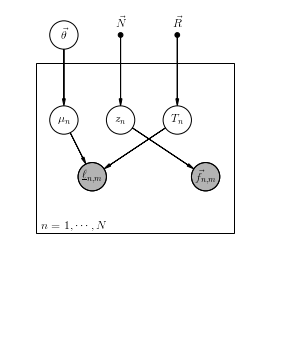

In [17]:
import matplotlib
%matplotlib inline

from matplotlib import rc
rc("font", family="serif", size=12)
rc("text", usetex=True)

import daft

# Instantiate the PGM.
pgm = daft.PGM([5, 6], origin=[0, 0])

#desired hyperparameters
pgm.add_node(daft.Node("cosmology", r"$\vec{\theta}$", 1., 5.5))
pgm.add_node(daft.Node("zdist", r"$\vec{N}$", 2., 5.5, fixed=True))
pgm.add_node(daft.Node("rates", r"$\vec{R}$", 3., 5.5, fixed=True))

#latent variables/parameters
pgm.add_node(daft.Node("distance", r"$\mu_{n}$", 1., 4))
pgm.add_node(daft.Node("redshift", r"$z_{n}$", 2., 4))
pgm.add_node(daft.Node("type", r"$T_{n}$", 3., 4))

#data
pgm.add_node(daft.Node("lightcurve", r"$\underline{\ell}_{n,m}$", 1.5, 3, observed=True))
pgm.add_node(daft.Node("photometry", r"$\vec{f}_{n,m}$", 3.5, 3, observed=True))

# Add in the edges.
pgm.add_edge("rates", "type")
pgm.add_edge("cosmology", "distance")
pgm.add_edge("zdist", "redshift")
pgm.add_edge("distance", "lightcurve")
pgm.add_edge("redshift", "photometry")
pgm.add_edge("type", "lightcurve")

# plates
pgm.add_plate(daft.Plate([0.5, 2., 3.5, 3.], label=r"$n = 1, \cdots, N$"))

# Render and save.
pgm.render()
pgm.figure.savefig("Hubble-draft.png", dpi=150)
pgm.figure.show()